<a href="https://colab.research.google.com/github/RicardoMourao-py/CNN-ALZHEIMER-CLASSIFICATION/blob/main/main_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# from google.colab import auth
# from google.cloud import storage
import warnings
warnings.filterwarnings('ignore')

import os
from os import listdir
import pathlib
from random import randint
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import tensorflow_addons as tfa
from keras.utils import load_img,img_to_array
from keras.models import Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.layers import MaxPooling2D,Dropout,Dense,Input,Conv2D,Flatten,Conv2DTranspose
from keras.layers import GlobalAveragePooling2D,MaxPool2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import plot_model
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [4]:
# !unzip data_slices/VeryMildDemented.zip
!unzip dataset.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: Alzheimer_s Dataset/NonDemented/31 (100).jpg  
  inflating: Alzheimer_s Dataset/NonDemented/31 (11).jpg  
  inflating: Alzheimer_s Dataset/NonDemented/31 (12).jpg  
  inflating: Alzheimer_s Dataset/NonDemented/31 (13).jpg  
  inflating: Alzheimer_s Dataset/NonDemented/31 (14).jpg  
  inflating: Alzheimer_s Dataset/NonDemented/31 (15).jpg  
  inflating: Alzheimer_s Dataset/NonDemented/31 (16).jpg  
  inflating: Alzheimer_s Dataset/NonDemented/31 (17).jpg  
  inflating: Alzheimer_s Dataset/NonDemented/31 (18).jpg  
  inflating: Alzheimer_s Dataset/NonDemented/31 (19).jpg  
  inflating: Alzheimer_s Dataset/NonDemented/31 (2).jpg  
  inflating: Alzheimer_s Dataset/NonDemented/31 (20).jpg  
  inflating: Alzheimer_s Dataset/NonDemented/31 (21).jpg  
  inflating: Alzheimer_s Dataset/NonDemented/31 (22).jpg  
  inflating: Alzheimer_s Dataset/NonDemented/31 (23).jpg  
  inflating: Alzheimer_s Dataset/NonDemented/31 (24).jpg

In [5]:
folder = './Alzheimer_s Dataset/'
folder_path = pathlib.Path(folder)

## Visualizando Imagem

<PIL.Image.Image image mode=RGB size=176x208 at 0x7EE605404340>


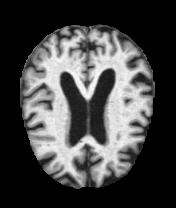

In [6]:
photo = load_img('./Alzheimer_s Dataset/MildDemented/26 (19).jpg')
print(photo)
photo

## Imagens e suas Classificações

In [7]:
for file in listdir(folder):
    print(file)

MildDemented
NonDemented
VeryMildDemented
ModerateDemented


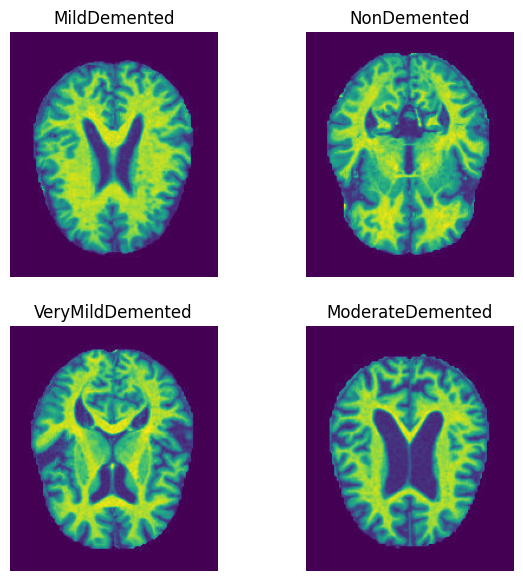

In [8]:
plt.figure(figsize=(7,7),)
j =0
for file in listdir(folder):
    i =0
    for image in listdir(folder+'/'+file):
        if i ==1:
            break;
        img = imread(folder +'/' + file + '/' + image)
        ax = plt.subplot(2,2,j+1)
        plt.imshow(img)
        plt.title(file)
        plt.axis('off')
        j = j+1
        i = i +1
plt.show()

In [9]:
# counting the number of images in each category
for file in listdir(folder):
    i =0
    for image in listdir(folder + '/'+file):
        i = i +1
    print(file , i)

MildDemented 896
NonDemented 3200
VeryMildDemented 2240
ModerateDemented 64


## Image Generator

In [10]:
# Criando o gerador de dados de imagem para ter mais amostras

IMG_SIZE = 128                  # tamanho da imagem de saída após o pré-processamento e aumento de dados
DIM = (IMG_SIZE, IMG_SIZE)      # tupla que especifica as dimensões da imagem de saída

ZOOM = [.99, 1.01]              # zoom que será aplicada às imagens
BRIGHT_RANGE = [0.8, 1.2]       #  ajuste de brilho
HORZ_FLIP = True                # espelhamento horizontal
FILL_MODE = "constant"          # pixels adicionados durante o redimensionamento serão preenchidos com um valor constante
DATA_FORMAT = "channels_last"   # formato dos dados é (altura, largura, canais)

In [41]:
# Gerador de dados de treinamento com aumento de dados e suas normalizações
train_generator = ImageDataGenerator(
                                      rescale = 1./255,
                                      brightness_range=BRIGHT_RANGE,
                                      zoom_range=ZOOM,
                                      data_format=DATA_FORMAT,
                                      fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP
                                    )

train_data_gen = train_generator.flow_from_directory(
                                                      directory=folder,
                                                      target_size=DIM,
                                                      batch_size=6500,
                                                      shuffle=False
                                                    )

Found 6400 images belonging to 4 classes.


In [39]:
CLASSES = list(train_data_gen.class_indices.keys())
CLASSES
# def show_images(generator,y_pred=None):
#     # get image lables
#     labels =dict(zip([0,1,2,3], CLASSES))

#     # get a batch of images
#     x,y = generator.next()

#     # display a grid of 9 images
#     plt.figure(figsize=(7, 7))
#     if y_pred is None:
#         for i in range(9):
#             ax = plt.subplot(3, 3, i + 1)
#             idx = randint(0, 6400)
#             plt.imshow(x[idx])
#             plt.axis("off")
#             plt.title("Class:{}".format(labels[np.argmax(y[idx])]))
#     else:
#         for i in range(9):
#             ax = plt.subplot(3, 3, i + 1)
#             plt.imshow(x[i])
#             plt.axis("off")
#             plt.title("Actual:{} \nPredicted:{}".format(labels[np.argmax(y[i])],labels[y_pred[i]]))

# # Display Train Images
# show_images(train_data_gen)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [43]:
# retorna o próximo lote de dados e suas respectivas etiquetas.
train_data, train_labels = train_data_gen.next()

In [44]:
train_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [14]:
train_data.shape, train_labels.shape

((6400, 128, 128, 3), (6400, 4))

In [15]:
# O SMOTE é uma técnica comumente usada para lidar com conjuntos de dados de classificação que
# têm classes minoritárias com menos exemplos do que as classes majoritárias.
sm = SMOTE(random_state=42)

train_data, train_labels = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)

print(train_data.shape, train_labels.shape)

(12800, 49152) (12800, 4)


In [16]:
# alterar as dimensões de um array sem alterar os dados em si
train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(train_data.shape, train_labels.shape)

(12800, 128, 128, 3) (12800, 4)


In [17]:
train_data, test_data, train_labels,test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

train_data, val_data, train_labels,val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

In [18]:
# Defining convolutional blocks
def conv_block(filters, act='relu'):

    block = Sequential()
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(Conv2D(filters, 3, activation=act, padding='same'))
    block.add(BatchNormalization())
    block.add(MaxPool2D())

    return block

In [19]:
# defining dense blocks
def dense_block(units, dropout_rate, act='relu'):
    block = Sequential()
    block.add(Dense(units, activation=act))
    block.add(BatchNormalization())
    block.add(Dropout(dropout_rate))

    return block

In [20]:
IMAGE_SIZE = [128,128]
act = 'relu'

In [21]:
model = Sequential([
        Input(shape=(*IMAGE_SIZE, 3)),
        Conv2D(16, 3, activation=act, padding='same'),
        Conv2D(16, 3, activation=act, padding='same'),
        MaxPool2D(),
        conv_block(32),
        conv_block(64),
        conv_block(128),
        Dropout(0.2),
        conv_block(256),
        Dropout(0.2),
        Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        Dense(4, activation='softmax')
    ], name = "cnn_model")

In [22]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'),
           tfa.metrics.F1Score(num_classes=4)]

model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

model.summary()

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 sequential (Sequential)     (None, 32, 32, 32)        14016     
                                                                 
 sequential_1 (Sequential)   (None, 16, 16, 64)        55680     
                                                                 
 sequential_2 (Sequential)   (None, 8, 8, 128)         221952    
                                                         

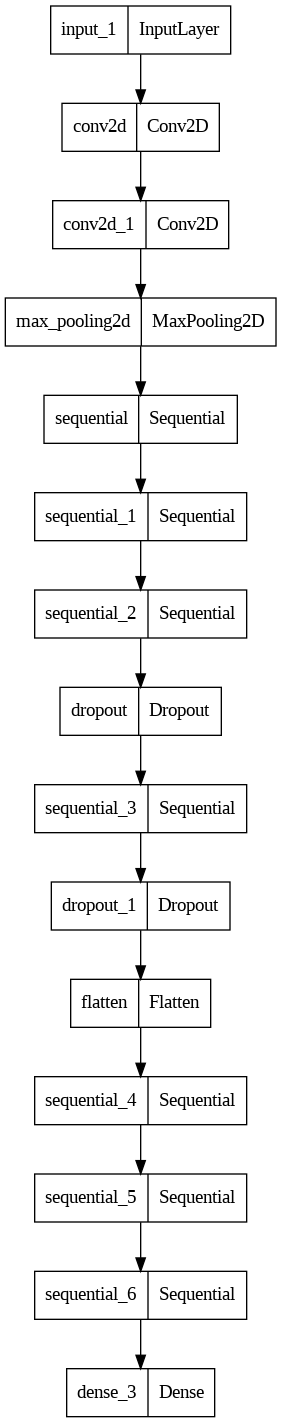

In [23]:
plot_model(model)

In [24]:
CALLBACKS = [
    EarlyStopping(monitor='accuracy', min_delta=0.01, patience=5, mode='max')
]

In [25]:
EPOCHS = 50

history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=EPOCHS,callbacks=CALLBACKS)

Epoch 1/50
255/256 [============================>.] - ETA: 0s - loss: 1.7200 - acc: 0.2615 - auc: 0.5168 - f1_score: 0.2604

256/256 [==============================] - 29s 45ms/step - loss: 1.7194 - acc: 0.2616 - auc: 0.5167 - f1_score: 0.2605 - val_loss: 1.7974 - val_acc: 0.2422 - val_auc: 0.5138 - val_f1_score: 0.0975
Epoch 2/50
255/256 [============================>.] - ETA: 0s - loss: 1.4342 - acc: 0.3115 - auc: 0.5729 - f1_score: 0.3088

256/256 [==============================] - 10s 38ms/step - loss: 1.4337 - acc: 0.3118 - auc: 0.5734 - f1_score: 0.3090 - val_loss: 2.0020 - val_acc: 0.2852 - val_auc: 0.5351 - val_f1_score: 0.1591
Epoch 3/50
256/256 [==============================] - ETA: 0s - loss: 1.0712 - acc: 0.5133 - auc: 0.7869 - f1_score: 0.4912

256/256 [==============================] - 10s 39ms/step - loss: 1.0712 - acc: 0.5133 - auc: 0.7869 - f1_score: 0.4912 - val_loss: 1.0667 - val_acc: 0.4692 - val_auc: 0.7842 - val_f1_score: 0.3885
Epoch 4/50
255/256 [============================>.] - ETA: 0s - loss: 0.8166 - acc: 0.6219 - auc: 0.8757 - f1_score: 0.6080

256/256 [==============================] - 10s 40ms/step - loss: 0.8159 - acc: 0.6222 - auc: 0.8759 - f1_score: 0.6083 - val_loss: 0.9994 - val_acc: 0.5322 - val_auc: 0.8231 - val_f1_score: 0.4717
Epoch 5/50
255/256 [============================>.] - ETA: 0s - loss: 0.7131 - acc: 0.6689 - auc: 0.9050 - f1_score: 0.6608

256/256 [==============================] - 10s 39ms/step - loss: 0.7138 - acc: 0.6683 - auc: 0.9048 - f1_score: 0.6603 - val_loss: 0.8061 - val_acc: 0.6523 - val_auc: 0.8886 - val_f1_score: 0.6540
Epoch 6/50
255/256 [============================>.] - ETA: 0s - loss: 0.6887 - acc: 0.6848 - auc: 0.9124 - f1_score: 0.6791

256/256 [==============================] - 11s 42ms/step - loss: 0.6878 - acc: 0.6854 - auc: 0.9127 - f1_score: 0.6796 - val_loss: 1.9443 - val_acc: 0.4932 - val_auc: 0.7998 - val_f1_score: 0.3608
Epoch 7/50
255/256 [============================>.] - ETA: 0s - loss: 0.6176 - acc: 0.7237 - auc: 0.9301 - f1_score: 0.7207

256/256 [==============================] - 10s 39ms/step - loss: 0.6175 - acc: 0.7236 - auc: 0.9301 - f1_score: 0.7207 - val_loss: 1.2287 - val_acc: 0.4478 - val_auc: 0.7535 - val_f1_score: 0.4319
Epoch 8/50
255/256 [============================>.] - ETA: 0s - loss: 0.5635 - acc: 0.7452 - auc: 0.9417 - f1_score: 0.7432

256/256 [==============================] - 10s 40ms/step - loss: 0.5630 - acc: 0.7456 - auc: 0.9418 - f1_score: 0.7437 - val_loss: 1.7419 - val_acc: 0.3418 - val_auc: 0.6767 - val_f1_score: 0.3046
Epoch 9/50
255/256 [============================>.] - ETA: 0s - loss: 0.5290 - acc: 0.7724 - auc: 0.9494 - f1_score: 0.7709

256/256 [==============================] - 10s 41ms/step - loss: 0.5290 - acc: 0.7722 - auc: 0.9494 - f1_score: 0.7707 - val_loss: 4.1739 - val_acc: 0.3667 - val_auc: 0.6132 - val_f1_score: 0.2344
Epoch 10/50
256/256 [==============================] - ETA: 0s - loss: 0.5060 - acc: 0.7808 - auc: 0.9528 - f1_score: 0.7800

256/256 [==============================] - 10s 41ms/step - loss: 0.5060 - acc: 0.7808 - auc: 0.9528 - f1_score: 0.7800 - val_loss: 1.0413 - val_acc: 0.6016 - val_auc: 0.8920 - val_f1_score: 0.5528
Epoch 11/50
255/256 [============================>.] - ETA: 0s - loss: 0.4427 - acc: 0.8080 - auc: 0.9635 - f1_score: 0.8078

256/256 [==============================] - 10s 41ms/step - loss: 0.4419 - acc: 0.8086 - auc: 0.9636 - f1_score: 0.8084 - val_loss: 4.1397 - val_acc: 0.3042 - val_auc: 0.6016 - val_f1_score: 0.1842
Epoch 12/50
255/256 [============================>.] - ETA: 0s - loss: 0.4477 - acc: 0.8064 - auc: 0.9628 - f1_score: 0.8060

256/256 [==============================] - 11s 43ms/step - loss: 0.4477 - acc: 0.8062 - auc: 0.9628 - f1_score: 0.8057 - val_loss: 0.8772 - val_acc: 0.6899 - val_auc: 0.8982 - val_f1_score: 0.6814
Epoch 13/50
255/256 [============================>.] - ETA: 0s - loss: 0.4007 - acc: 0.8287 - auc: 0.9699 - f1_score: 0.8283

256/256 [==============================] - 10s 39ms/step - loss: 0.4009 - acc: 0.8289 - auc: 0.9699 - f1_score: 0.8285 - val_loss: 0.6548 - val_acc: 0.7148 - val_auc: 0.9288 - val_f1_score: 0.7223
Epoch 14/50
255/256 [============================>.] - ETA: 0s - loss: 0.3648 - acc: 0.8477 - auc: 0.9747 - f1_score: 0.8473

256/256 [==============================] - 10s 39ms/step - loss: 0.3652 - acc: 0.8474 - auc: 0.9747 - f1_score: 0.8470 - val_loss: 0.4103 - val_acc: 0.8223 - val_auc: 0.9688 - val_f1_score: 0.8177
Epoch 15/50
255/256 [============================>.] - ETA: 0s - loss: 0.3685 - acc: 0.8452 - auc: 0.9746 - f1_score: 0.8450

256/256 [==============================] - 10s 39ms/step - loss: 0.3689 - acc: 0.8448 - auc: 0.9745 - f1_score: 0.8447 - val_loss: 1.6658 - val_acc: 0.5566 - val_auc: 0.8296 - val_f1_score: 0.4775
Epoch 16/50
255/256 [============================>.] - ETA: 0s - loss: 0.3052 - acc: 0.8767 - auc: 0.9823 - f1_score: 0.8767

256/256 [==============================] - 10s 39ms/step - loss: 0.3059 - acc: 0.8766 - auc: 0.9822 - f1_score: 0.8765 - val_loss: 2.5932 - val_acc: 0.5093 - val_auc: 0.7670 - val_f1_score: 0.3959
Epoch 17/50
255/256 [============================>.] - ETA: 0s - loss: 0.3137 - acc: 0.8763 - auc: 0.9813 - f1_score: 0.8765

256/256 [==============================] - 10s 39ms/step - loss: 0.3140 - acc: 0.8762 - auc: 0.9813 - f1_score: 0.8764 - val_loss: 0.9847 - val_acc: 0.6724 - val_auc: 0.8938 - val_f1_score: 0.6398
Epoch 18/50
255/256 [============================>.] - ETA: 0s - loss: 0.2613 - acc: 0.8996 - auc: 0.9869 - f1_score: 0.8996

256/256 [==============================] - 10s 40ms/step - loss: 0.2613 - acc: 0.8997 - auc: 0.9868 - f1_score: 0.8995 - val_loss: 3.1530 - val_acc: 0.4214 - val_auc: 0.6980 - val_f1_score: 0.3698
Epoch 19/50
255/256 [============================>.] - ETA: 0s - loss: 0.2301 - acc: 0.9152 - auc: 0.9897 - f1_score: 0.9151

256/256 [==============================] - 10s 40ms/step - loss: 0.2308 - acc: 0.9149 - auc: 0.9896 - f1_score: 0.9148 - val_loss: 0.7960 - val_acc: 0.7559 - val_auc: 0.9299 - val_f1_score: 0.7536
Epoch 20/50
255/256 [============================>.] - ETA: 0s - loss: 0.2174 - acc: 0.9201 - auc: 0.9905 - f1_score: 0.9201

256/256 [==============================] - 10s 40ms/step - loss: 0.2171 - acc: 0.9202 - auc: 0.9905 - f1_score: 0.9201 - val_loss: 0.4419 - val_acc: 0.8433 - val_auc: 0.9707 - val_f1_score: 0.8438
Epoch 21/50
256/256 [==============================] - ETA: 0s - loss: 0.1969 - acc: 0.9290 - auc: 0.9922 - f1_score: 0.9289

256/256 [==============================] - 10s 39ms/step - loss: 0.1969 - acc: 0.9290 - auc: 0.9922 - f1_score: 0.9289 - val_loss: 2.1541 - val_acc: 0.6055 - val_auc: 0.8000 - val_f1_score: 0.5469
Epoch 22/50
255/256 [============================>.] - ETA: 0s - loss: 0.1574 - acc: 0.9436 - auc: 0.9949 - f1_score: 0.9436

256/256 [==============================] - 10s 40ms/step - loss: 0.1576 - acc: 0.9435 - auc: 0.9949 - f1_score: 0.9435 - val_loss: 1.5809 - val_acc: 0.5791 - val_auc: 0.8196 - val_f1_score: 0.5461
Epoch 23/50
255/256 [============================>.] - ETA: 0s - loss: 0.1794 - acc: 0.9347 - auc: 0.9932 - f1_score: 0.9348

256/256 [==============================] - 10s 39ms/step - loss: 0.1792 - acc: 0.9347 - auc: 0.9932 - f1_score: 0.9347 - val_loss: 0.7603 - val_acc: 0.7676 - val_auc: 0.9409 - val_f1_score: 0.7390
Epoch 24/50
255/256 [============================>.] - ETA: 0s - loss: 0.1345 - acc: 0.9551 - auc: 0.9956 - f1_score: 0.9551

256/256 [==============================] - 10s 39ms/step - loss: 0.1347 - acc: 0.9551 - auc: 0.9956 - f1_score: 0.9550 - val_loss: 0.3745 - val_acc: 0.8774 - val_auc: 0.9768 - val_f1_score: 0.8790
Epoch 25/50
255/256 [============================>.] - ETA: 0s - loss: 0.1391 - acc: 0.9528 - auc: 0.9955 - f1_score: 0.9528

256/256 [==============================] - 10s 40ms/step - loss: 0.1394 - acc: 0.9529 - auc: 0.9955 - f1_score: 0.9528 - val_loss: 0.4313 - val_acc: 0.8569 - val_auc: 0.9746 - val_f1_score: 0.8571
Epoch 26/50
255/256 [============================>.] - ETA: 0s - loss: 0.1143 - acc: 0.9624 - auc: 0.9969 - f1_score: 0.9624

256/256 [==============================] - 10s 40ms/step - loss: 0.1145 - acc: 0.9623 - auc: 0.9969 - f1_score: 0.9623 - val_loss: 0.3760 - val_acc: 0.8726 - val_auc: 0.9763 - val_f1_score: 0.8722
Epoch 27/50
255/256 [============================>.] - ETA: 0s - loss: 0.1068 - acc: 0.9640 - auc: 0.9972 - f1_score: 0.9640

256/256 [==============================] - 10s 40ms/step - loss: 0.1065 - acc: 0.9641 - auc: 0.9972 - f1_score: 0.9641 - val_loss: 0.5098 - val_acc: 0.8525 - val_auc: 0.9697 - val_f1_score: 0.8468
Epoch 28/50
255/256 [============================>.] - ETA: 0s - loss: 0.1125 - acc: 0.9629 - auc: 0.9965 - f1_score: 0.9628

256/256 [==============================] - 11s 42ms/step - loss: 0.1122 - acc: 0.9630 - auc: 0.9965 - f1_score: 0.9630 - val_loss: 0.3008 - val_acc: 0.8867 - val_auc: 0.9875 - val_f1_score: 0.8843
Epoch 29/50
255/256 [============================>.] - ETA: 0s - loss: 0.1165 - acc: 0.9621 - auc: 0.9960 - f1_score: 0.9621

256/256 [==============================] - 10s 40ms/step - loss: 0.1162 - acc: 0.9622 - auc: 0.9960 - f1_score: 0.9622 - val_loss: 0.4742 - val_acc: 0.8467 - val_auc: 0.9676 - val_f1_score: 0.8452
Epoch 30/50
255/256 [============================>.] - ETA: 0s - loss: 0.0835 - acc: 0.9703 - auc: 0.9982 - f1_score: 0.9703

256/256 [==============================] - 10s 39ms/step - loss: 0.0832 - acc: 0.9705 - auc: 0.9982 - f1_score: 0.9704 - val_loss: 0.2673 - val_acc: 0.9087 - val_auc: 0.9892 - val_f1_score: 0.9074
Epoch 31/50
255/256 [============================>.] - ETA: 0s - loss: 0.0758 - acc: 0.9744 - auc: 0.9983 - f1_score: 0.9744

256/256 [==============================] - 10s 40ms/step - loss: 0.0761 - acc: 0.9742 - auc: 0.9983 - f1_score: 0.9742 - val_loss: 0.3294 - val_acc: 0.8989 - val_auc: 0.9819 - val_f1_score: 0.8971
Epoch 32/50
255/256 [============================>.] - ETA: 0s - loss: 0.0719 - acc: 0.9772 - auc: 0.9986 - f1_score: 0.9772

256/256 [==============================] - 10s 40ms/step - loss: 0.0717 - acc: 0.9773 - auc: 0.9986 - f1_score: 0.9773 - val_loss: 0.3135 - val_acc: 0.9048 - val_auc: 0.9842 - val_f1_score: 0.9026
Epoch 33/50
255/256 [============================>.] - ETA: 0s - loss: 0.0782 - acc: 0.9741 - auc: 0.9978 - f1_score: 0.9741

256/256 [==============================] - 10s 39ms/step - loss: 0.0786 - acc: 0.9741 - auc: 0.9978 - f1_score: 0.9741 - val_loss: 0.6997 - val_acc: 0.8062 - val_auc: 0.9552 - val_f1_score: 0.7923
Epoch 34/50
255/256 [============================>.] - ETA: 0s - loss: 0.0509 - acc: 0.9842 - auc: 0.9988 - f1_score: 0.9842

256/256 [==============================] - 10s 40ms/step - loss: 0.0512 - acc: 0.9841 - auc: 0.9988 - f1_score: 0.9841 - val_loss: 1.0425 - val_acc: 0.7642 - val_auc: 0.9207 - val_f1_score: 0.7585
Epoch 35/50
255/256 [============================>.] - ETA: 0s - loss: 0.0856 - acc: 0.9740 - auc: 0.9973 - f1_score: 0.9740

256/256 [==============================] - 10s 40ms/step - loss: 0.0853 - acc: 0.9741 - auc: 0.9973 - f1_score: 0.9741 - val_loss: 0.2990 - val_acc: 0.9087 - val_auc: 0.9846 - val_f1_score: 0.9093
Epoch 36/50
255/256 [============================>.] - ETA: 0s - loss: 0.0579 - acc: 0.9825 - auc: 0.9988 - f1_score: 0.9825

256/256 [==============================] - 10s 40ms/step - loss: 0.0579 - acc: 0.9824 - auc: 0.9988 - f1_score: 0.9824 - val_loss: 1.1859 - val_acc: 0.7212 - val_auc: 0.9054 - val_f1_score: 0.7100
Epoch 37/50
255/256 [============================>.] - ETA: 0s - loss: 0.0565 - acc: 0.9827 - auc: 0.9988 - f1_score: 0.9827

256/256 [==============================] - 11s 42ms/step - loss: 0.0566 - acc: 0.9827 - auc: 0.9988 - f1_score: 0.9827 - val_loss: 0.4970 - val_acc: 0.8423 - val_auc: 0.9693 - val_f1_score: 0.8389
Epoch 38/50
255/256 [============================>.] - ETA: 0s - loss: 0.0794 - acc: 0.9734 - auc: 0.9979 - f1_score: 0.9734

256/256 [==============================] - 10s 39ms/step - loss: 0.0793 - acc: 0.9734 - auc: 0.9979 - f1_score: 0.9734 - val_loss: 0.4055 - val_acc: 0.8799 - val_auc: 0.9776 - val_f1_score: 0.8750
Epoch 39/50
255/256 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.9820 - auc: 0.9992 - f1_score: 0.9820

256/256 [==============================] - 10s 40ms/step - loss: 0.0556 - acc: 0.9818 - auc: 0.9991 - f1_score: 0.9818 - val_loss: 0.4290 - val_acc: 0.8989 - val_auc: 0.9717 - val_f1_score: 0.8967
Epoch 40/50
256/256 [==============================] - ETA: 0s - loss: 0.0532 - acc: 0.9814 - auc: 0.9990 - f1_score: 0.9814

256/256 [==============================] - 10s 39ms/step - loss: 0.0532 - acc: 0.9814 - auc: 0.9990 - f1_score: 0.9814 - val_loss: 1.1895 - val_acc: 0.7295 - val_auc: 0.8939 - val_f1_score: 0.7163
Epoch 41/50
255/256 [============================>.] - ETA: 0s - loss: 0.0520 - acc: 0.9841 - auc: 0.9987 - f1_score: 0.9841

256/256 [==============================] - 10s 40ms/step - loss: 0.0520 - acc: 0.9840 - auc: 0.9987 - f1_score: 0.9840 - val_loss: 0.3056 - val_acc: 0.9106 - val_auc: 0.9841 - val_f1_score: 0.9091
Epoch 42/50
255/256 [============================>.] - ETA: 0s - loss: 0.0495 - acc: 0.9841 - auc: 0.9985 - f1_score: 0.9841

256/256 [==============================] - 11s 42ms/step - loss: 0.0496 - acc: 0.9840 - auc: 0.9985 - f1_score: 0.9840 - val_loss: 0.8173 - val_acc: 0.8052 - val_auc: 0.9405 - val_f1_score: 0.8012
Epoch 43/50
255/256 [============================>.] - ETA: 0s - loss: 0.0534 - acc: 0.9830 - auc: 0.9990 - f1_score: 0.9830

256/256 [==============================] - 11s 42ms/step - loss: 0.0533 - acc: 0.9829 - auc: 0.9990 - f1_score: 0.9829 - val_loss: 0.5833 - val_acc: 0.8550 - val_auc: 0.9659 - val_f1_score: 0.8458
Epoch 44/50
255/256 [============================>.] - ETA: 0s - loss: 0.0524 - acc: 0.9821 - auc: 0.9990 - f1_score: 0.9821

256/256 [==============================] - 10s 39ms/step - loss: 0.0523 - acc: 0.9822 - auc: 0.9990 - f1_score: 0.9822 - val_loss: 1.3438 - val_acc: 0.7173 - val_auc: 0.8916 - val_f1_score: 0.7065
Epoch 45/50
255/256 [============================>.] - ETA: 0s - loss: 0.0549 - acc: 0.9825 - auc: 0.9985 - f1_score: 0.9825

256/256 [==============================] - 10s 40ms/step - loss: 0.0547 - acc: 0.9825 - auc: 0.9985 - f1_score: 0.9825 - val_loss: 0.4068 - val_acc: 0.8887 - val_auc: 0.9768 - val_f1_score: 0.8871
Epoch 46/50
255/256 [============================>.] - ETA: 0s - loss: 0.0568 - acc: 0.9800 - auc: 0.9990 - f1_score: 0.9800

256/256 [==============================] - 10s 39ms/step - loss: 0.0577 - acc: 0.9800 - auc: 0.9989 - f1_score: 0.9800 - val_loss: 0.2571 - val_acc: 0.9326 - val_auc: 0.9854 - val_f1_score: 0.9325
Epoch 47/50
255/256 [============================>.] - ETA: 0s - loss: 0.0421 - acc: 0.9850 - auc: 0.9995 - f1_score: 0.9850

256/256 [==============================] - 10s 40ms/step - loss: 0.0428 - acc: 0.9850 - auc: 0.9994 - f1_score: 0.9850 - val_loss: 0.2094 - val_acc: 0.9478 - val_auc: 0.9884 - val_f1_score: 0.9475
Epoch 48/50
255/256 [============================>.] - ETA: 0s - loss: 0.0435 - acc: 0.9869 - auc: 0.9989 - f1_score: 0.9869

256/256 [==============================] - 11s 42ms/step - loss: 0.0434 - acc: 0.9869 - auc: 0.9990 - f1_score: 0.9869 - val_loss: 0.2465 - val_acc: 0.9351 - val_auc: 0.9868 - val_f1_score: 0.9343
Epoch 49/50
255/256 [============================>.] - ETA: 0s - loss: 0.0417 - acc: 0.9862 - auc: 0.9991 - f1_score: 0.9862

256/256 [==============================] - 10s 40ms/step - loss: 0.0417 - acc: 0.9862 - auc: 0.9991 - f1_score: 0.9862 - val_loss: 0.5871 - val_acc: 0.8501 - val_auc: 0.9616 - val_f1_score: 0.8511
Epoch 50/50
255/256 [============================>.] - ETA: 0s - loss: 0.0515 - acc: 0.9841 - auc: 0.9987 - f1_score: 0.9841

256/256 [==============================] - 10s 40ms/step - loss: 0.0515 - acc: 0.9840 - auc: 0.9987 - f1_score: 0.9840 - val_loss: 0.2296 - val_acc: 0.9385 - val_auc: 0.9888 - val_f1_score: 0.9377


In [26]:
test_scores = model.evaluate(test_data, test_labels)
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

80/80 [==============================] - 1s 14ms/step - loss: 0.2981 - acc: 0.9234 - auc: 0.9839 - f1_score: 0.9233
Testing Accuracy: 92.34%


In [29]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.6 MB/s eta 0:00:00


In [38]:
test_labels[[600]]

array([[0, 1, 0, 0]])

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:14, 14.23s/it]               


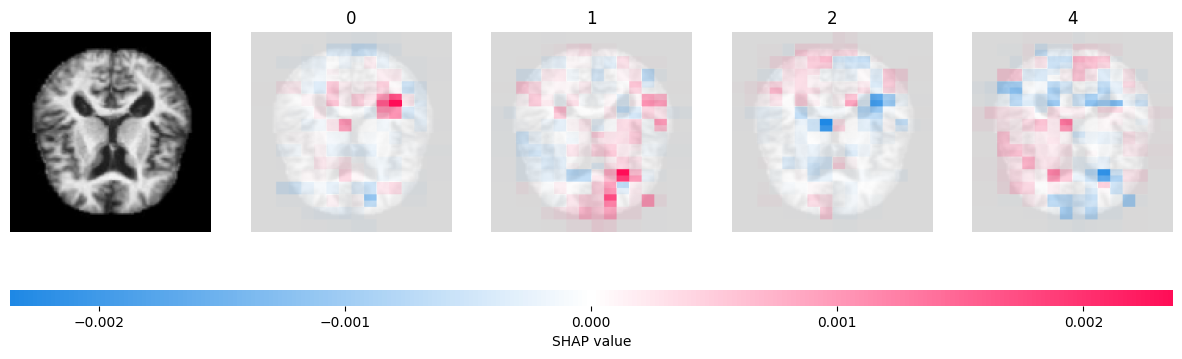

In [32]:
import shap
def f(x):
    tmp = x.copy()
    return model(tmp)
masker_blur = shap.maskers.Image("blur(32,32)", test_data[0].shape)
explainer = shap.Explainer(f, masker_blur, output_names=list(range(4)))
ind=[600]
shap_values_ = explainer( test_data[ind], max_evals=5000, batch_size=50 )
shap.image_plot(shap_values_,labels=[0,1,2,4])

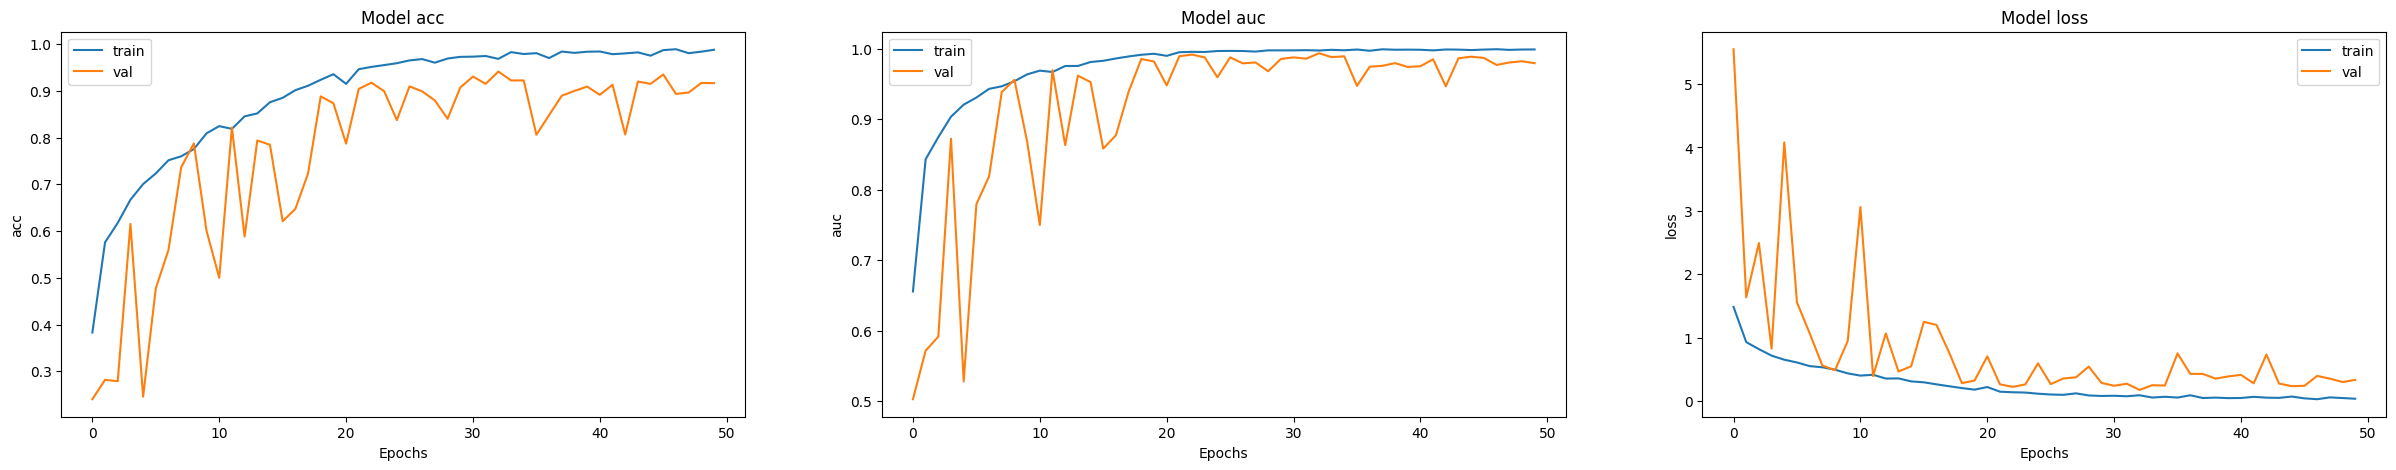

In [ ]:
#Plotting the trend of the metrics during training

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

80/80 [==============================] - 1s 6ms/step


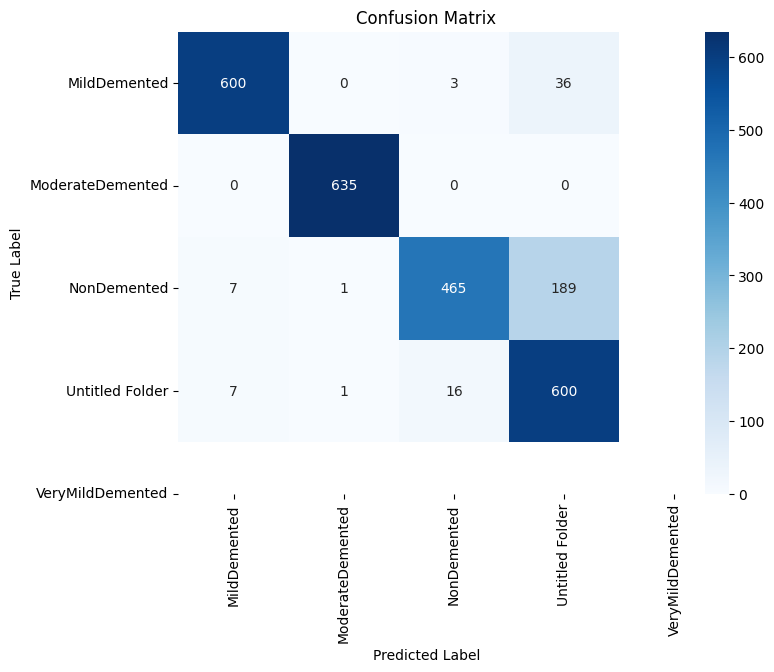

In [ ]:
# Convertendo as previsões para classes
test_predictions = model.predict(test_data)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(test_true_classes, test_predictions_classes)

# Plotando a matriz de confusão usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=CLASSES, yticklabels=CLASSES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculando métricas
accuracy = accuracy_score(test_true_classes, test_predictions_classes)
precision = precision_score(test_true_classes, test_predictions_classes, average='weighted')
recall = recall_score(test_true_classes, test_predictions_classes, average='weighted')
f1 = f1_score(test_true_classes, test_predictions_classes, average='weighted')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Sensibilidade:", recall)
print("F1-Score:", f1)

Acurácia: 0.8984375
Precisão: 0.9169011036617022
Sensibilidade: 0.8984375
F1-Score: 0.8984250619168005


In [ ]:
inception = InceptionV3(input_shape=(128,128,3),include_top=False,weights ='imagenet')

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
inception_model = Sequential([
        inception,
        Dropout(0.5),
        GlobalAveragePooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(4, activation='softmax')
    ], name = "inception_cnn_model")
inception_model.compile(optimizer='rmsprop',
                              loss=tf.losses.CategoricalCrossentropy(),
                              metrics=METRICS)

inception_model.summary()

Model: "inception_cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 dropout_5 (Dropout)         (None, 2, 2, 2048)        0         
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_101 (B  (None, 2048)              8192      
 atchNormalization)                                              
                                                                 
 dense_4 (Dense)             (None, 512)       

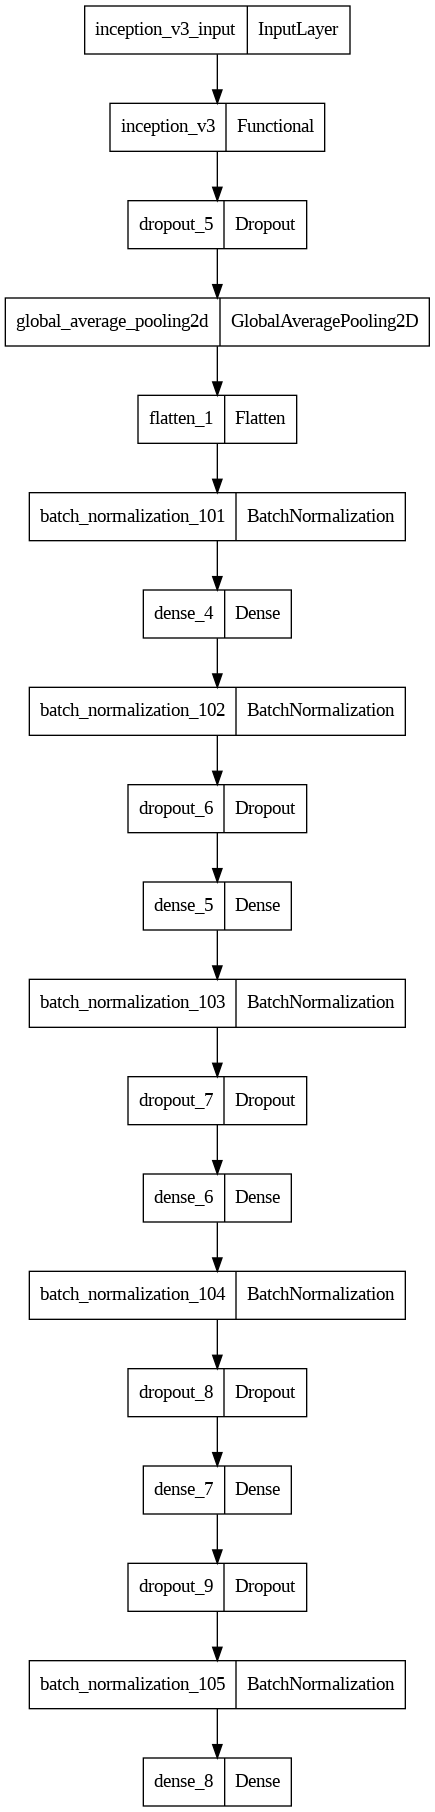

In [ ]:
plot_model(inception_model)

In [ ]:
INCEPT_CALLBACKS = [
    ModelCheckpoint(filepath='incpt_model_checkpoint.h5', save_best_only=True),
    EarlyStopping(patience=3)
]

In [ ]:
incept_history = inception_model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=50,callbacks= INCEPT_CALLBACKS)

Epoch 1/50
256/256 [==============================] - 20s 45ms/step - loss: 1.4139 - acc: 0.5153 - auc: 0.7820 - f1_score: 0.5140 - val_loss: 0.8298 - val_acc: 0.6172 - val_auc: 0.8736 - val_f1_score: 0.5539
Epoch 2/50
256/256 [==============================] - 6s 25ms/step - loss: 0.9703 - acc: 0.5552 - auc: 0.8278 - f1_score: 0.5415 - val_loss: 0.7335 - val_acc: 0.6377 - val_auc: 0.8966 - val_f1_score: 0.5747
Epoch 3/50
256/256 [==============================] - 7s 27ms/step - loss: 0.8530 - acc: 0.6099 - auc: 0.8667 - f1_score: 0.5922 - val_loss: 0.6773 - val_acc: 0.6758 - val_auc: 0.9130 - val_f1_score: 0.6517
Epoch 4/50
256/256 [==============================] - 7s 27ms/step - loss: 0.7878 - acc: 0.6454 - auc: 0.8866 - f1_score: 0.6342 - val_loss: 0.6579 - val_acc: 0.6870 - val_auc: 0.9175 - val_f1_score: 0.6711
Epoch 5/50
256/256 [==============================] - 7s 26ms/step - loss: 0.7575 - acc: 0.6658 - auc: 0.8958 - f1_score: 0.6554 - val_loss: 0.6143 - val_acc: 0.7202 - val

In [ ]:
incept_test_scores = inception_model.evaluate(test_data, test_labels)
print("Testing Accuracy: %.2f%%"%(incept_test_scores[1] * 100))

80/80 [==============================] - 2s 19ms/step - loss: 0.3394 - acc: 0.8664 - auc: 0.9789 - f1_score: 0.8655
Testing Accuracy: 86.64%


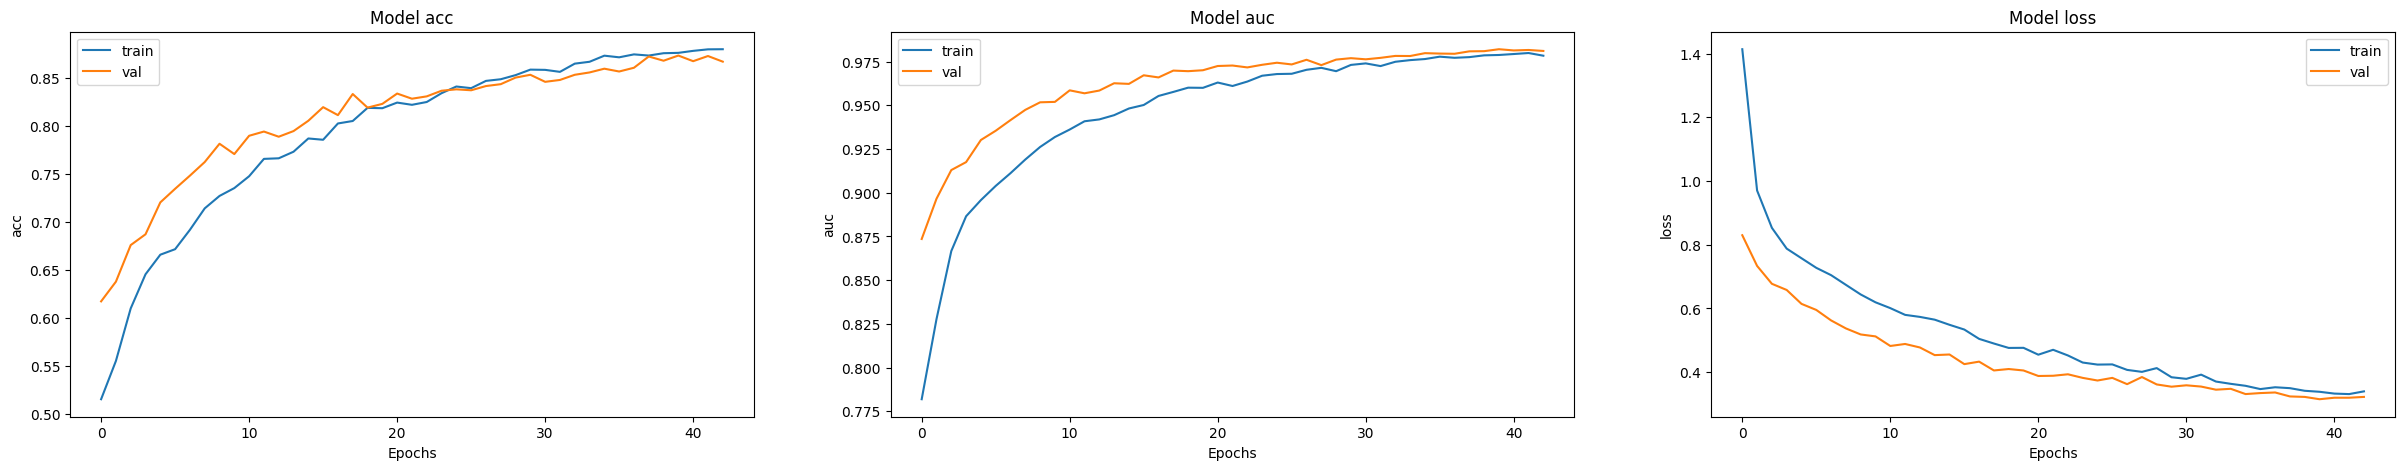

In [ ]:
#Plotting the trend of the metrics during training

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(incept_history.history[metric])
    ax[i].plot(incept_history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

80/80 [==============================] - 3s 18ms/step


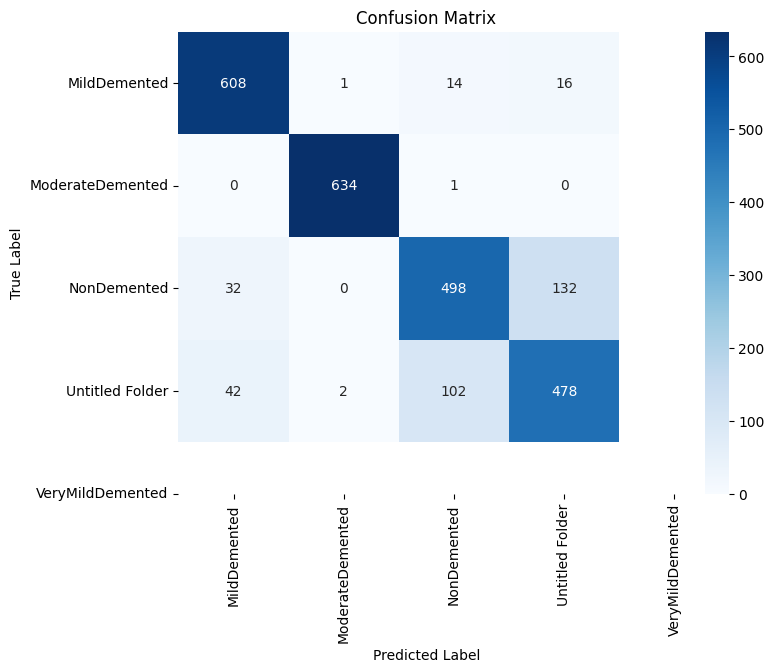

In [ ]:
# Convertendo as previsões para classes
test_predictions = inception_model.predict(test_data)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(test_true_classes, test_predictions_classes)

# Plotando a matriz de confusão usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=CLASSES, yticklabels=CLASSES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculando métricas
accuracy = accuracy_score(test_true_classes, test_predictions_classes)
precision = precision_score(test_true_classes, test_predictions_classes, average='weighted')
recall = recall_score(test_true_classes, test_predictions_classes, average='weighted')
f1 = f1_score(test_true_classes, test_predictions_classes, average='weighted')

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Sensibilidade:", recall)
print("F1-Score:", f1)

Acurácia: 0.86640625
Precisão: 0.8649244095069066
Sensibilidade: 0.86640625
F1-Score: 0.8651469426291147


In [ ]:
# entender o que ta colaborando, quais fatias sao usadas na classificação, shap
# o que que é um unidade que ele classifica, o que é uma linha do dataset uma fatia?
# verificar dados

In [ ]:
import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
import numpy as np
import shap
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# set batch size
TRAIN_BATCH_SIZE = 64
VAL_BATCH_SIZE = 64
# set transformation for training and validation
transform_train = transforms.Compose([
                transforms.Resize(size = (224, 224)),
                transforms.ToTensor(),
                transforms.Normalize(mean=(0.5946, 0.5732, 0.5126), std=(0.2671, 0.2737, 0.3058)) # use calculated mean and std
                ])

# # define data loader
# train_loader = torch.utils.data.DataLoader(train_data,
#                                            batch_size=TRAIN_BATCH_SIZE,
#                                            shuffle=True,
#                                            num_workers=4)
# test_loader = torch.utils.data.DataLoader(test_data,
#                                           batch_size=VAL_BATCH_SIZE,
#                                           shuffle=False,
#                                           num_workers=4)

# set transformation for SHAP visualization
base_transform = transforms.Compose([
                 transforms.Resize(size = (224, 224)),
                 transforms.ToTensor()
                 ])
# set dataset
base_dataset = datasets.ImageFolder("./dataset", transform=base_transform)
# define data loader
base_loader = torch.utils.data.DataLoader(base_dataset,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=4)

In [ ]:
batch = next(iter(base_loader))
images, labels = batch

background = images[:61].to(device)
test_images = images[61:64].to(device)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
        

In [ ]:
e = shap.DeepExplainer(model, background)
shap_values = e.shap_values(test_images)

shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
test_numpy = np.swapaxes(np.swapaxes(test_images.detach().cpu().numpy(), 1, -1), 1, 2)

# plot the feature attributions
shap.image_plot(shap_numpy, test_numpy)

AttributeError: ignored